# TF-IDF Scripts

### Import Libraries

In [19]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Custom Functions and File Imports

In [20]:
stemming = PorterStemmer()
stops = set(stopwords.words("english")) 

def removeStopWords(row):
    stemmed = row['stemmed']
    cleaned = [w for w in stemmed if not w in stops]
    cleaned = listToString(cleaned)
    return cleaned

def tokenize(row):
    message = row['message'].lower()
    tokens = word_tokenize(message)
    tok_words = [w for w in tokens if w.isalpha()]
    return tok_words
    
def stem(row):
    tokens = row['tokenized']
    stemmed = [stemming.stem(word) for word in tokens]
    return stemmed

def listToString(lst):
    text = ' '.join(lst)
    return text

In [21]:
os.chdir("D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\pew0") # CHANGE VALUE PER BATCH
files = []
for file in glob.glob("*.csv"):
    print(file)
    files.append(file)
    
print(files)    

annotatorA.csv
annotatorB.csv
annotatorC.csv
['annotatorA.csv', 'annotatorB.csv', 'annotatorC.csv']


In [22]:
coder1 = pd.read_csv(files[0])
coder1.fillna(0)
coder2 = pd.read_csv(files[1])
coder2.fillna(0)
#coder3 = pd.read_excel('usanews0full_3.xlsx')
coder3 = pd.read_csv(files[2])
coder3.fillna(0)

,Unnamed: 0,message,author,time_text,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0,ayyyy,username@HtHrtytytr,0:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,:_pewdieDuck::_pewdieDuck::_pewdieDuck::_pewdi...,username@ei.lteiiik,0:01:00,0.0,0.0,0.0,0.0,0.0,0.0
2,2,:_pewdieRicardo:,username@조조이이이아아조낌조,0:02:00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,:_pewdieBrofist::_pewdieBrofist::_pewdieBrofist:,username@2jij33a2ij,0:03:00,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Late gang,username@r DkUDUr t,0:07:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9792,9792,bye jack,username@KlAAeeAlKA,2:16:45,0.0,0.0,0.0,0.0,0.0,0.0
9793,9793,byeeee,username@eerosrroGs,2:16:46,0.0,0.0,0.0,0.0,0.0,0.0
9794,9794,#ERROR!,username@ByyyeyoBoe,2:16:46,0.0,0.0,0.0,0.0,0.0,0.0
9795,9795,later yall,username@mmerJeJree,2:16:46,0.0,0.0,0.0,0.0,0.0,0.0


### Combine Documents Per Label

In [23]:
dHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Direct Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Direct Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Direct Harassment'] == 1.0]

dHarassment = pd.concat([temp0, temp1, temp2])
dHarassment.drop(dHarassment.columns.difference(['Unnamed: 0', 'message','Direct Harassment']), 1, inplace=True)

dHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
dHarassment
#duplicateRowsDF = dHarassment[dHarassment.duplicated()]
#duplicateRowsDF

,Unnamed: 0,message,Direct Harassment
185,185,gay lol,1.0
909,909,ew get Jack outta here,1.0
931,931,jack is back at crack,1.0
961,961,ew jackie lamieeeeee,1.0
2601,2601,chat no sucks wtf,1.0
...,...,...,...
9309,9309,he's going to die,1.0
9474,9474,felix you too jumpy drink your damn coffee,1.0
9547,9547,Stupid hair AHHAHA,1.0
9595,9595,people still have hair wtf,1.0


In [24]:
hSpeech = pd.DataFrame()
temp0 = coder1.loc[coder1['Hate Speech'] == 1.0]
temp1 = coder2.loc[coder2['Hate Speech'] == 1.0]
temp2 = coder3.loc[coder3['Hate Speech'] == 1.0]

hSpeech = pd.concat([temp0, temp1, temp2])
hSpeech.drop(hSpeech.columns.difference(['Unnamed: 0', 'message','Hate Speech']), 1, inplace=True)

hSpeech.drop_duplicates(subset ="message", keep = False, inplace = True)
hSpeech

,Unnamed: 0,message,Hate Speech
3722,3722,Ken is the master already can't play with NOOB...,1.0
5093,5093,THEN GET OUT JASH,1.0
6878,6878,Gay,1.0
9138,9138,NIGEROOOOO,1.0
104,104,Æ,1.0
325,325,I clicked on this notification faster than Chr...,1.0
485,485,:_pewdieNotvegan::_pewdieNotvegan::_pewdieNotv...,1.0
1390,1390,:_pewdieNotvegan:that’s not vegan,1.0
1399,1399,Gey,1.0
2031,2031,Eyyy my gay,1.0


In [25]:
sHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Sexual Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Sexual Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Sexual Harassment'] == 1.0]

sHarassment = pd.concat([temp0, temp1, temp2])
sHarassment.drop(sHarassment.columns.difference(['Unnamed: 0', 'message','Sexual Harassment']), 1, inplace=True)

sHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
sHarassment

,Unnamed: 0,message,Sexual Harassment
2909,2909,👁👅👁,1.0
6868,6868,Nancy mad. time of the month? lol,1.0
6947,6947,Nancy a ho,1.0
41,41,jigggyy,1.0
70,70,POG,1.0
...,...,...,...
8615,8615,Ill simp for maria,1.0
8815,8815,i'd frick a sleep paralysis demon NGL,1.0
8854,8854,Fs in the chat if you'd frick a sleep paralysi...,1.0
8917,8917,Ur simp if u dont frick demon,1.0


In [26]:
trolling = pd.DataFrame()
temp0 = coder1.loc[coder1['Trolling'] == 1.0]
temp1 = coder2.loc[coder2['Trolling'] == 1.0]
temp2 = coder3.loc[coder3['Trolling'] == 1.0]

trolling = pd.concat([temp0, temp1, temp2])
trolling.drop(trolling.columns.difference(['Unnamed: 0', 'message','Trolling']), 1, inplace=True)

trolling.drop_duplicates(subset ="message", keep = False, inplace = True)
trolling

,Unnamed: 0,message,Trolling
3054,3054,Pewds has legs?! Must be photoshopped,1.0
3403,3403,JACK CANT CAR SWIPE,1.0
3567,3567,"Today at the bank, an old lady asked me to che...",1.0
4453,4453,Dont touch me there. woah,1.0
4730,4730,Felix left the cursor in the screen. He's a bo...,1.0
...,...,...,...
9557,9557,your hair is perfect papa,1.0
9595,9595,people still have hair wtf,1.0
9645,9645,Spit on ceiling it won’t spit back I swear,1.0
9662,9662,a ghost came up and licked his hair,1.0


In [27]:
others = pd.DataFrame()
temp0 = coder1.loc[coder1['Others'] == 1.0]
temp1 = coder2.loc[coder2['Others'] == 1.0]
temp2 = coder3.loc[coder3['Others'] == 1.0]

others = pd.concat([temp0, temp1, temp2])
others.drop(others.columns.difference(['Unnamed: 0', 'message','Others']), 1, inplace=True)

others.drop_duplicates(subset ="message", keep = False, inplace = True)
others

,Unnamed: 0,message,Others
1035,1035,ah cut me!!!,1.0
1060,1060,I have been sliced,1.0
1208,1208,"guns allowed, knife not",1.0
1375,1375,USE THE KNIFE DURING GAME,1.0
1441,1441,Use the knife in VR,1.0
2009,2009,jack need smack,1.0
5004,5004,"pls stop complaining, no delay nor quite voice",1.0
7131,7131,I NEED DAVE CORPSE KEN AND PJ,1.0
7228,7228,they’re gonna die-,1.0
7233,7233,theyre totally gonna die haha,1.0


In [28]:
toxic = pd.DataFrame()
temp0 = coder1.loc[coder1['Toxic'] == 1.0]
temp1 = coder2.loc[coder2['Toxic'] == 1.0]
temp2 = coder3.loc[coder3['Toxic'] == 1.0]

toxic = pd.concat([temp0, temp1, temp2])
toxic.drop(toxic.columns.difference(['Unnamed: 0', 'message','Toxic']), 1, inplace=True)

toxic.drop_duplicates(subset ="message", keep = False, inplace = True)
toxic

,Unnamed: 0,message,Toxic
185,185,gay lol,1.0
909,909,ew get Jack outta here,1.0
931,931,jack is back at crack,1.0
961,961,ew jackie lamieeeeee,1.0
1035,1035,ah cut me!!!,1.0
...,...,...,...
8815,8815,i'd frick a sleep paralysis demon NGL,1.0
8854,8854,Fs in the chat if you'd frick a sleep paralysi...,1.0
8917,8917,Ur simp if u dont frick demon,1.0
8928,8928,@DBT how about you just not read the chat? any...,1.0


## NLP Text Processing Stuff


In [29]:
dHarassment['tokenized'] = dHarassment.apply(tokenize, axis=1)
dHarassment['stemmed'] = dHarassment.apply(stem, axis=1)
dHarassment['stop_words'] = dHarassment.apply(removeStopWords, axis=1)
dHarassment

,Unnamed: 0,message,Direct Harassment,tokenized,stemmed,stop_words
185,185,gay lol,1.0,"[gay, lol]","[gay, lol]",gay lol
909,909,ew get Jack outta here,1.0,"[ew, get, jack, outta, here]","[ew, get, jack, outta, here]",ew get jack outta
931,931,jack is back at crack,1.0,"[jack, is, back, at, crack]","[jack, is, back, at, crack]",jack back crack
961,961,ew jackie lamieeeeee,1.0,"[ew, jackie, lamieeeeee]","[ew, jacki, lamieeeee]",ew jacki lamieeeee
2601,2601,chat no sucks wtf,1.0,"[chat, no, sucks, wtf]","[chat, no, suck, wtf]",chat suck wtf
...,...,...,...,...,...,...
9309,9309,he's going to die,1.0,"[he, going, to, die]","[he, go, to, die]",go die
9474,9474,felix you too jumpy drink your damn coffee,1.0,"[felix, you, too, jumpy, drink, your, damn, co...","[felix, you, too, jumpi, drink, your, damn, co...",felix jumpi drink damn coffe
9547,9547,Stupid hair AHHAHA,1.0,"[stupid, hair, ahhaha]","[stupid, hair, ahhaha]",stupid hair ahhaha
9595,9595,people still have hair wtf,1.0,"[people, still, have, hair, wtf]","[peopl, still, have, hair, wtf]",peopl still hair wtf


In [30]:
hSpeech['tokenized'] = hSpeech.apply(tokenize, axis=1)
hSpeech['stemmed'] = hSpeech.apply(stem, axis=1)
hSpeech['stop_words'] = hSpeech.apply(removeStopWords, axis=1)
hSpeech

,Unnamed: 0,message,Hate Speech,tokenized,stemmed,stop_words
3722,3722,Ken is the master already can't play with NOOB...,1.0,"[ken, is, the, master, already, ca, play, with...","[ken, is, the, master, alreadi, ca, play, with...",ken master alreadi ca play noobdiepi
5093,5093,THEN GET OUT JASH,1.0,"[then, get, out, jash]","[then, get, out, jash]",get jash
6878,6878,Gay,1.0,[gay],[gay],gay
9138,9138,NIGEROOOOO,1.0,[nigerooooo],[nigerooooo],nigerooooo
104,104,Æ,1.0,[æ],[æ],æ
325,325,I clicked on this notification faster than Chr...,1.0,"[i, clicked, on, this, notification, faster, t...","[i, click, on, thi, notif, faster, than, chri,...",click thi notif faster chri brown die stomp yard
485,485,:_pewdieNotvegan::_pewdieNotvegan::_pewdieNotv...,1.0,[],[],
1390,1390,:_pewdieNotvegan:that’s not vegan,1.0,"[that, s, not, vegan]","[that, s, not, vegan]",vegan
1399,1399,Gey,1.0,[gey],[gey],gey
2031,2031,Eyyy my gay,1.0,"[eyyy, my, gay]","[eyyy, my, gay]",eyyy gay


In [31]:
sHarassment['tokenized'] = sHarassment.apply(tokenize, axis=1)
sHarassment['stemmed'] = sHarassment.apply(stem, axis=1)
sHarassment['stop_words'] = sHarassment.apply(removeStopWords, axis=1)
sHarassment

,Unnamed: 0,message,Sexual Harassment,tokenized,stemmed,stop_words
2909,2909,👁👅👁,1.0,[],[],
6868,6868,Nancy mad. time of the month? lol,1.0,"[nancy, mad, time, of, the, month, lol]","[nanci, mad, time, of, the, month, lol]",nanci mad time month lol
6947,6947,Nancy a ho,1.0,"[nancy, a, ho]","[nanci, a, ho]",nanci ho
41,41,jigggyy,1.0,[jigggyy],[jigggyy],jigggyy
70,70,POG,1.0,[pog],[pog],pog
...,...,...,...,...,...,...
8615,8615,Ill simp for maria,1.0,"[ill, simp, for, maria]","[ill, simp, for, maria]",ill simp maria
8815,8815,i'd frick a sleep paralysis demon NGL,1.0,"[i, frick, a, sleep, paralysis, demon, ngl]","[i, frick, a, sleep, paralysi, demon, ngl]",frick sleep paralysi demon ngl
8854,8854,Fs in the chat if you'd frick a sleep paralysi...,1.0,"[fs, in, the, chat, if, you, frick, a, sleep, ...","[fs, in, the, chat, if, you, frick, a, sleep, ...",fs chat frick sleep paralysi demon right
8917,8917,Ur simp if u dont frick demon,1.0,"[ur, simp, if, u, dont, frick, demon]","[ur, simp, if, u, dont, frick, demon]",ur simp u dont frick demon


In [32]:
trolling['tokenized'] = trolling.apply(tokenize, axis=1)
trolling['stemmed'] = trolling.apply(stem, axis=1)
trolling['stop_words'] = trolling.apply(removeStopWords, axis=1)
trolling

,Unnamed: 0,message,Trolling,tokenized,stemmed,stop_words
3054,3054,Pewds has legs?! Must be photoshopped,1.0,"[pewds, has, legs, must, be, photoshopped]","[pewd, ha, leg, must, be, photoshop]",pewd ha leg must photoshop
3403,3403,JACK CANT CAR SWIPE,1.0,"[jack, cant, car, swipe]","[jack, cant, car, swipe]",jack cant car swipe
3567,3567,"Today at the bank, an old lady asked me to che...",1.0,"[today, at, the, bank, an, old, lady, asked, m...","[today, at, the, bank, an, old, ladi, ask, me,...",today bank old ladi ask check balanc push
4453,4453,Dont touch me there. woah,1.0,"[dont, touch, me, there, woah]","[dont, touch, me, there, woah]",dont touch woah
4730,4730,Felix left the cursor in the screen. He's a bo...,1.0,"[felix, left, the, cursor, in, the, screen, he...","[felix, left, the, cursor, in, the, screen, he...",felix left cursor screen boomer evid
...,...,...,...,...,...,...
9557,9557,your hair is perfect papa,1.0,"[your, hair, is, perfect, papa]","[your, hair, is, perfect, papa]",hair perfect papa
9595,9595,people still have hair wtf,1.0,"[people, still, have, hair, wtf]","[peopl, still, have, hair, wtf]",peopl still hair wtf
9645,9645,Spit on ceiling it won’t spit back I swear,1.0,"[spit, on, ceiling, it, won, t, spit, back, i,...","[spit, on, ceil, it, won, t, spit, back, i, sw...",spit ceil spit back swear
9662,9662,a ghost came up and licked his hair,1.0,"[a, ghost, came, up, and, licked, his, hair]","[a, ghost, came, up, and, lick, hi, hair]",ghost came lick hi hair


In [33]:
others['tokenized'] = others.apply(tokenize, axis=1)
others['stemmed'] = others.apply(stem, axis=1)
others['stop_words'] = others.apply(removeStopWords, axis=1)
others

,Unnamed: 0,message,Others,tokenized,stemmed,stop_words
1035,1035,ah cut me!!!,1.0,"[ah, cut, me]","[ah, cut, me]",ah cut
1060,1060,I have been sliced,1.0,"[i, have, been, sliced]","[i, have, been, slice]",slice
1208,1208,"guns allowed, knife not",1.0,"[guns, allowed, knife, not]","[gun, allow, knife, not]",gun allow knife
1375,1375,USE THE KNIFE DURING GAME,1.0,"[use, the, knife, during, game]","[use, the, knife, dure, game]",use knife dure game
1441,1441,Use the knife in VR,1.0,"[use, the, knife, in, vr]","[use, the, knife, in, vr]",use knife vr
2009,2009,jack need smack,1.0,"[jack, need, smack]","[jack, need, smack]",jack need smack
5004,5004,"pls stop complaining, no delay nor quite voice",1.0,"[pls, stop, complaining, no, delay, nor, quite...","[pl, stop, complain, no, delay, nor, quit, voic]",pl stop complain delay quit voic
7131,7131,I NEED DAVE CORPSE KEN AND PJ,1.0,"[i, need, dave, corpse, ken, and, pj]","[i, need, dave, corps, ken, and, pj]",need dave corps ken pj
7228,7228,they’re gonna die-,1.0,"[they, re, gon, na]","[they, re, gon, na]",gon na
7233,7233,theyre totally gonna die haha,1.0,"[theyre, totally, gon, na, die, haha]","[theyr, total, gon, na, die, haha]",theyr total gon na die haha


In [34]:
toxic['tokenized'] = toxic.apply(tokenize, axis=1)
toxic['stemmed'] = toxic.apply(stem, axis=1)
toxic['stop_words'] = toxic.apply(removeStopWords, axis=1)
toxic

,Unnamed: 0,message,Toxic,tokenized,stemmed,stop_words
185,185,gay lol,1.0,"[gay, lol]","[gay, lol]",gay lol
909,909,ew get Jack outta here,1.0,"[ew, get, jack, outta, here]","[ew, get, jack, outta, here]",ew get jack outta
931,931,jack is back at crack,1.0,"[jack, is, back, at, crack]","[jack, is, back, at, crack]",jack back crack
961,961,ew jackie lamieeeeee,1.0,"[ew, jackie, lamieeeeee]","[ew, jacki, lamieeeee]",ew jacki lamieeeee
1035,1035,ah cut me!!!,1.0,"[ah, cut, me]","[ah, cut, me]",ah cut
...,...,...,...,...,...,...
8815,8815,i'd frick a sleep paralysis demon NGL,1.0,"[i, frick, a, sleep, paralysis, demon, ngl]","[i, frick, a, sleep, paralysi, demon, ngl]",frick sleep paralysi demon ngl
8854,8854,Fs in the chat if you'd frick a sleep paralysi...,1.0,"[fs, in, the, chat, if, you, frick, a, sleep, ...","[fs, in, the, chat, if, you, frick, a, sleep, ...",fs chat frick sleep paralysi demon right
8917,8917,Ur simp if u dont frick demon,1.0,"[ur, simp, if, u, dont, frick, demon]","[ur, simp, if, u, dont, frick, demon]",ur simp u dont frick demon
8928,8928,@DBT how about you just not read the chat? any...,1.0,"[dbt, how, about, you, just, not, read, the, c...","[dbt, how, about, you, just, not, read, the, c...",dbt read chat anyon talk anyth want lmao


### TFIDF Stuff

#### TFIDF On Direct Harassment

In [35]:
#no text processing
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(dHar.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [36]:
#stop words removed
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(dHar.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

In [37]:
df.head()

,10,14,20,2020,48,75k,_pewdiebrofist,_pewdieelon,_pewdiefloorgang,_pewdiefrip,...,wtf,xxx_tentacion_xxx,yalls,ye,year,yes,yo,you,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.486693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df1.head()

,abil,accid,account,ahhaha,ahol,alon,along,alreadi,also,alway,...,wish,worst,would,wow,write,wtf,yall,ye,year,yo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.565688,0.0,0.0,0.0,0.0


<AxesSubplot:>

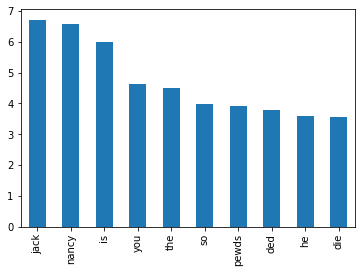

In [39]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

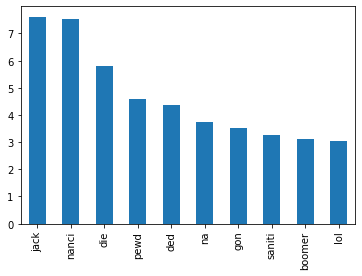

In [40]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Hate Speech

In [41]:
vectorizer = TfidfVectorizer()
hSpe = vectorizer.fit_transform(hSpeech['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(hSpe.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [42]:
#stop words removed
vectorizer = TfidfVectorizer()
hSpe = vectorizer.fit_transform(hSpeech['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(hSpe.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

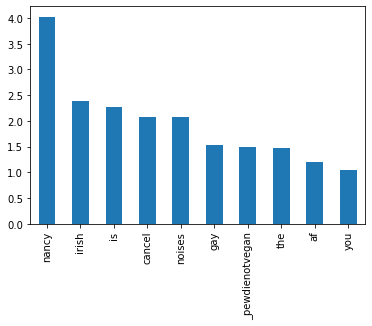

In [43]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

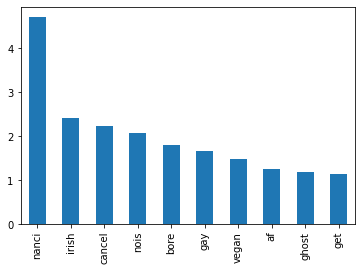

In [44]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Sexual Harassment

In [45]:
vectorizer = TfidfVectorizer()
sHar = vectorizer.fit_transform(sHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(sHar.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [46]:
#stop words removed
vectorizer = TfidfVectorizer()
sHar = vectorizer.fit_transform(sHarassment['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(sHar.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

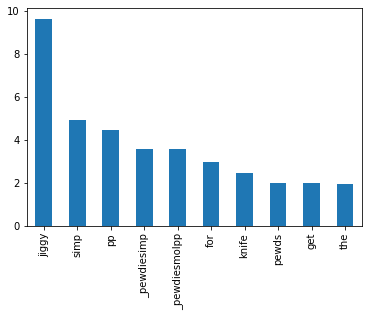

In [47]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

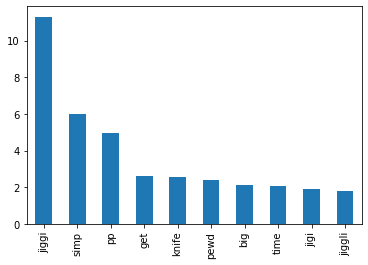

In [48]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Trolling

In [49]:
vectorizer = TfidfVectorizer()
troll = vectorizer.fit_transform(trolling['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(troll.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [50]:
#stop words removed
vectorizer = TfidfVectorizer()
troll = vectorizer.fit_transform(trolling['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(troll.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

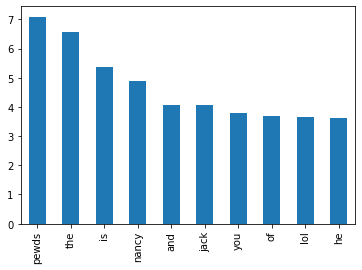

In [51]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

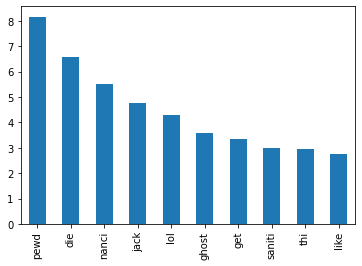

In [52]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Others

In [53]:
vectorizer = TfidfVectorizer()
oth = vectorizer.fit_transform(others['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(oth.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [54]:
#stop words removed
vectorizer = TfidfVectorizer()
oth = vectorizer.fit_transform(others['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(oth.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

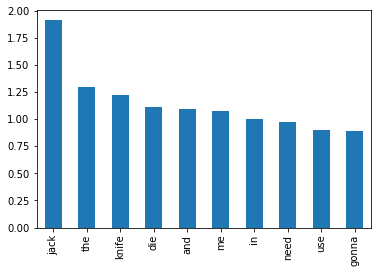

In [55]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

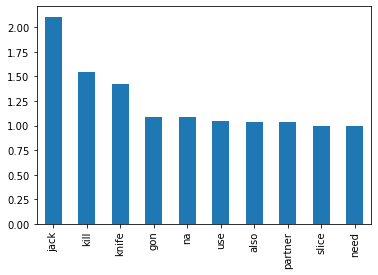

In [56]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Toxic

In [57]:
vectorizer = TfidfVectorizer()
tox = vectorizer.fit_transform(toxic['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(tox.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [58]:
#stop words removed
vectorizer = TfidfVectorizer()
tox = vectorizer.fit_transform(toxic['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(tox.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

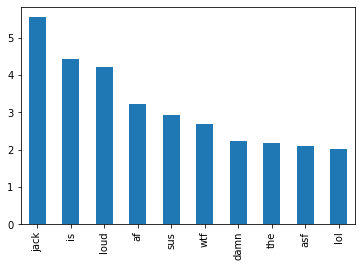

In [59]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

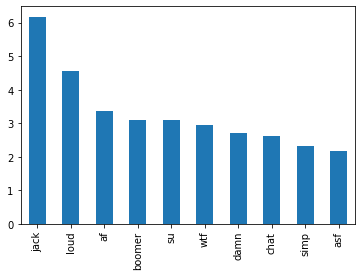

In [60]:
vals1 = vals1[0:10]
vals1.plot.bar()